> # **Queimadas no estado do Maranhão nos anos de 2018 a 2022**


1. Introdução

O projeto foi elaborado com finalidade de realizar uma análise exploratória de dados sobre datasets dos focos de calor ocorridos no estado do Maranhão no quadriênio de 2018 á 2022. O Maranhão está localizado na região Nordeste, apresenta uma grande extensão territorial e composto por três biomas, Cerrado (64% do Estado), Amazônia (35%) e Caatinga (1%). O estado durante o período anual registra grande incidência de focos de calor que atingem os seus municípios e florestas, entre fatores causadores, podemos enumerar: desmatamento, o clima quente em certos períodos do ano, além de ações humanas.

“Focos de calor nos estados e nos biomas, servem como indicador de queimadas e incêndios florestais, devidos a causas naturais ou antrópicas diversas. A partir da detecção regular via satélite, podem-se constatar tendências espaciais e temporais nas ocorrências de fogo. São excelentes indicadores da ocorrência de fogo na vegetação e permitem comparações temporais e espaciais para intervalos maiores que dez dias, mas não devem ser considerados como medida absoluta da ocorrência de fogo – que certamente é maior do que a indicada pelos focos”. (BRASIL,2021).

Esse projeto se justifica na medida em que busca entender e estabelecer relações entre a frequência com que são detectados os focos de calor e consequências eminentes  para o estado, levando ainda em consideração que no Brasil, segundo dados divulgados pelo Inep (2021), “as queimadas e incêndios florestais ocorrem principalmente em biomas da Amazônia e do Cerrado”, cerca de 99% do ecossistema do estado.buscamos também fa Além de propor soluções que possam ser utilizadas por autoridades em forma de ajudar a combater o mais breve possível focos de calor e consequentemente o combate a queimadas.

	


2. Objetivo

Realizar uma análise exploratória de dados sobre datasets dos focos de calor ocorridos no estado do Maranhão no quadriênio de 2018 á 2022, disponibilizados pelo Instituto Nacional de Pesquisa Espacial.

3. Métodos

O trabalho foi desenvolvido através da solicitação dos arquivos de dados fornecidos pelo portal das queimadas do INPE no período de 01 de novembro 2018 a 01 de novembro de 2022. Em seguida, começamos o processamento dos dados, com criação, limpeza e transformação, utilizando as através das bibliotecas do python: pandas, plotly, matplotlibs, seaborn geomaps, gerando por fim, mapas e gráficos que serviram de base para ilustração, descrição e discussão dos dados obtidos.

3.1 Importação da base de dados

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
 # Ler os arquivos
 # Obs: não foram disponibilizados os dados para o ano de 2019 e 2020, dessa forma usamos uma base anteriormente baixada
queimadas_2018_2019 = pd.read_csv('/content/drive/My Drive/LETS CODE SUZANO - Turma 864/Projeto 3/Focos_2018-11-01_2019-11-01.csv', sep =',') 
MA_queimadas_2019_2020 = pd.read_csv('/content/drive/My Drive/LETS CODE SUZANO - Turma 864/Projeto 3/dados de focos de calor para maranhão 2019 a 2020.csv', sep =';') 
queimadas_2020_2021 = pd.read_csv('/content/drive/My Drive/LETS CODE SUZANO - Turma 864/Projeto 3/Focos_2020-11-01_2021-11-01.csv', sep =',')
queimadas_2021_2022 = pd.read_csv('/content/drive/My Drive/LETS CODE SUZANO - Turma 864/Projeto 3/Focos_2021-11-01_2022-11-01.csv', sep =',')  

In [ ]:
# Visualizar arquivos
queimadas_2018_2019.info()
MA_queimadas_2019_2020.head(2)

#note que o cabeçalho está diferente, iremos renomeá-lo adiante

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3712211 entries, 0 to 3712210
Data columns (total 12 columns):
 #   Column        Dtype  
---  ------        -----  
 0   datahora      object 
 1   satelite      object 
 2   pais          object 
 3   estado        object 
 4   municipio     object 
 5   bioma         object 
 6   diasemchuva   float64
 7   precipitacao  float64
 8   riscofogo     float64
 9   latitude      float64
 10  longitude     float64
 11  frp           float64
dtypes: float64(6), object(6)
memory usage: 339.9+ MB


,"datahora,C,80","satelite,C,80","pais,C,80","estado,C,80","municipio,C,80","bioma,C,80","diasemchuv,N,9,0","precipitac,N,24,15","riscofogo,N,24,15","latitude,N,24,15","longitude,N,24,15","frp,N,24,15"
0,2019/11/01 00:04:47,GOES-16,Brasil,MARANHAO,MIRADOR,Cerrado,3,0,"0,9","-6,25","-44,31",0
1,2019/11/01 00:04:47,GOES-16,Brasil,MARANHAO,MIRADOR,Cerrado,3,0,"0,9","-6,26","-44,31",0


3.2 Tratamento da base de dados

In [ ]:
# Selecionando somente o estado de Maranhão das outras bases
MA_queimadas_2018_2019 = queimadas_2018_2019.loc[(queimadas_2018_2019['estado']=='MARANHAO')]
MA_queimadas_2020_2021 = queimadas_2020_2021.loc[(queimadas_2020_2021['estado']=='MARANHAO')]
MA_queimadas_2021_2022 = queimadas_2021_2022.loc[(queimadas_2021_2022['estado']=='MARANHAO')]

In [ ]:
# Renomeando nome das colunas da base MA_queimadas_2019_2020 para ficar igual as outras
dict = {'datahora,C,80': 'datahora', 
        'satelite,C,80': 'satelite',
        'pais,C,80': 'pais',
        'estado,C,80': 'estado',
        'municipio,C,80': 'municipio',
        'bioma,C,80': 'bioma',
        'diasemchuv,N,9,0': 'diasemchuva',
        'riscofogo,N,24,15': 'riscofogo',
        'precipitac,N,24,15': 'precipitacao',
        'latitude,N,24,15': 'latitude',
        'longitude,N,24,15': 'longitude',
        'frp,N,24,15': 'frp'}

MA_queimadas_2019_2020.rename(columns = dict, inplace = True)

# Unindo as tabelas uma abaixo da outra 

MA_queimadas_2018_2022 = pd.concat([MA_queimadas_2018_2019, MA_queimadas_2019_2020, MA_queimadas_2020_2021, MA_queimadas_2021_2022], axis = 0)
MA_queimadas_2018_2022.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1607902 entries, 15 to 4416497
Data columns (total 12 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   datahora      1607902 non-null  object 
 1   satelite      1607902 non-null  object 
 2   pais          1607902 non-null  object 
 3   estado        1607902 non-null  object 
 4   municipio     1607902 non-null  object 
 5   bioma         1607902 non-null  object 
 6   diasemchuva   1592320 non-null  float64
 7   precipitacao  1592320 non-null  object 
 8   riscofogo     1592320 non-null  object 
 9   latitude      1607902 non-null  object 
 10  longitude     1607902 non-null  object 
 11  frp           1244694 non-null  object 
dtypes: float64(1), object(11)
memory usage: 159.5+ MB


In [ ]:
# Excluir valores duplicados

base_MA_queimadas_2018_2022 = MA_queimadas_2018_2022.drop_duplicates()
base_MA_queimadas_2018_2022.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1606758 entries, 15 to 4416497
Data columns (total 12 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   datahora      1606758 non-null  object 
 1   satelite      1606758 non-null  object 
 2   pais          1606758 non-null  object 
 3   estado        1606758 non-null  object 
 4   municipio     1606758 non-null  object 
 5   bioma         1606758 non-null  object 
 6   diasemchuva   1591176 non-null  float64
 7   precipitacao  1591176 non-null  object 
 8   riscofogo     1591176 non-null  object 
 9   latitude      1606758 non-null  object 
 10  longitude     1606758 non-null  object 
 11  frp           1243879 non-null  object 
dtypes: float64(1), object(11)
memory usage: 159.4+ MB


In [ ]:
# Separando mês e ano
base_MA_queimadas_2018_2022['mes'] = pd.DatetimeIndex(base_MA_queimadas_2018_2022['datahora']).month
base_MA_queimadas_2018_2022['ano'] = pd.DatetimeIndex(base_MA_queimadas_2018_2022['datahora']).year

base_MA_queimadas_2018_2022.head(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,datahora,satelite,pais,estado,municipio,bioma,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp,mes,ano
15,2019/10/27 14:10:00,TERRA_M-T,Brasil,MARANHAO,BURITICUPU,Amazonia,4.0,0.0,0.9,-4.248,-46.309,41.9,10,2019
16,2019/10/27 14:10:00,TERRA_M-T,Brasil,MARANHAO,BURITICUPU,Amazonia,4.0,0.0,0.9,-4.252,-46.316,31.5,10,2019


In [ ]:
# Salvar o novo dataframe
base_MA_queimadas_2018_2022.to_csv('/content/drive/My Drive/LETS CODE SUZANO - Turma 864/Projeto 3/Queimadas em Maranhão_2018_2022.csv', encoding = 'utf-8')

In [ ]:
 # Ler o novo dataframe / atalho para não precisar fazer tudo de novo
queimadas_MA_2018_2022 = pd.read_csv('/content/drive/MyDrive/LETS CODE SUZANO - Turma 864/Projeto 3/Queimadas em Maranhão_2018_2022.csv', sep =',')  

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (8,9,10,11,12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
queimadas_MA_2018_2022.head()

,Unnamed: 0,datahora,satelite,pais,estado,municipio,bioma,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp,mes,ano
0,90,2019/08/07 16:51:20,NOAA-20,Brasil,MARANHAO,TUNTUM,Cerrado,28.0,0.0,1.0,-5.86856,-44.72367,NaN,8,2019
1,103,2019/08/07 16:51:20,NOAA-20,Brasil,MARANHAO,MIRADOR,Cerrado,29.0,0.0,1.0,-6.4648,-45.04496,NaN,8,2019
2,171,2019/08/07 16:51:20,NOAA-20,Brasil,MARANHAO,LORETO,Cerrado,30.0,0.0,1.0,-6.81344,-45.18399,NaN,8,2019
3,172,2019/08/07 16:51:20,NOAA-20,Brasil,MARANHAO,SAO DOMINGOS DO AZEITAO,Cerrado,30.0,0.0,1.0,-6.74052,-44.65049,NaN,8,2019
4,227,2019/08/07 16:51:20,NOAA-20,Brasil,MARANHAO,BALSAS,Cerrado,30.0,0.0,1.0,-8.73552,-46.80449,NaN,8,2019


3.3 Análise Uni e multivariada

1. Quantas queimadas no estado ocorreram por mês entre 2018 e 2022? Qual relação com os casos da COVID-19?


In [ ]:
queimadas_ano_mes = queimadas_MA_2018_2022.groupby(['estado', 'ano', 'mes']).size().reset_index().rename(columns = {0: 'total_queimadas'})
queimadas_ano_mes.head()

,estado,ano,mes,total_queimadas
0,MARANHAO,2018,11,30773
1,MARANHAO,2018,12,8242
2,MARANHAO,2019,1,6091
3,MARANHAO,2019,2,392
4,MARANHAO,2019,3,174


In [ ]:
# Gráfico 1 
import matplotlib.pyplot as plt
import seaborn as sns
queimadas_ano_mes['ano_mes'] = queimadas_ano_mes['ano'].astype(str) + '-' + queimadas_ano_mes['mes'].astype(str)
queimadas_ano_mes.head()

,estado,ano,mes,total_queimadas,ano_mes
0,MARANHAO,2018,11,30773,2018-11
1,MARANHAO,2018,12,8242,2018-12
2,MARANHAO,2019,1,6091,2019-1
3,MARANHAO,2019,2,392,2019-2
4,MARANHAO,2019,3,174,2019-3


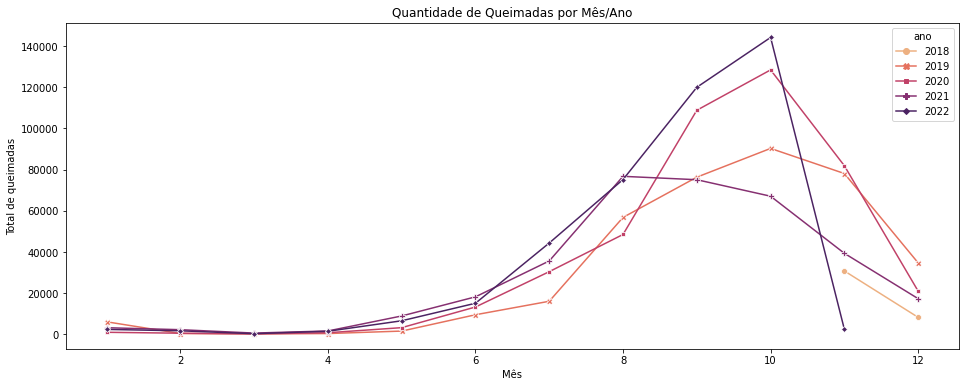

In [ ]:
plt.figure(figsize=(16,6))
sns.lineplot(data=queimadas_ano_mes, x='mes', y='total_queimadas', hue='ano', style="ano", markers=True, dashes=False, palette="flare")
plt.xlabel('Mês')
plt.ylabel('Total de queimadas')
plt.title('Quantidade de Queimadas por Mês/Ano');

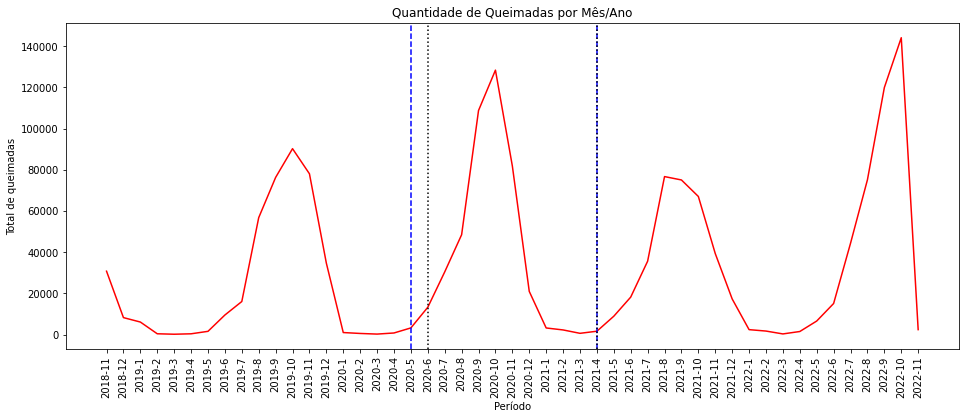

In [ ]:
plt.figure(figsize=(16,6))
sns.lineplot(data=queimadas_ano_mes, x='ano_mes', y='total_queimadas', color='r')
# plt.axvline(x, ymin, ymax)

# picos de novos casos:
plt.axvline('2020-5', 0, queimadas_ano_mes['total_queimadas'].max(), linestyle='--', color='blue')
plt.axvline('2021-4', 0, queimadas_ano_mes['total_queimadas'].max(), linestyle='--', color='blue') 
# picos de mortes:
plt.axvline('2020-6', 0, queimadas_ano_mes['total_queimadas'].max(), linestyle=':',  color='black')
plt.axvline('2021-4', 0, queimadas_ano_mes['total_queimadas'].max(), linestyle=':', color='black')

plt.xticks(rotation=90);
plt.xlabel('Período');
plt.ylabel('Total de queimadas')
plt.title('Quantidade de Queimadas por Mês/Ano');

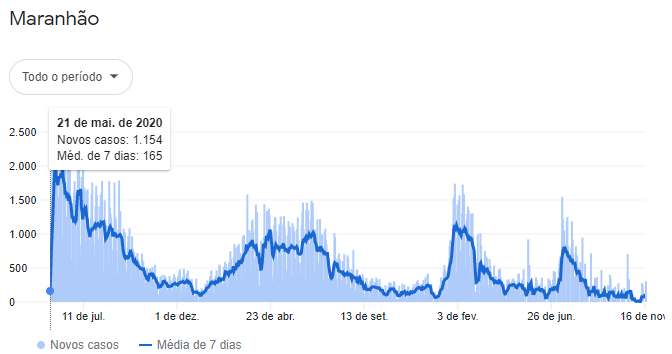

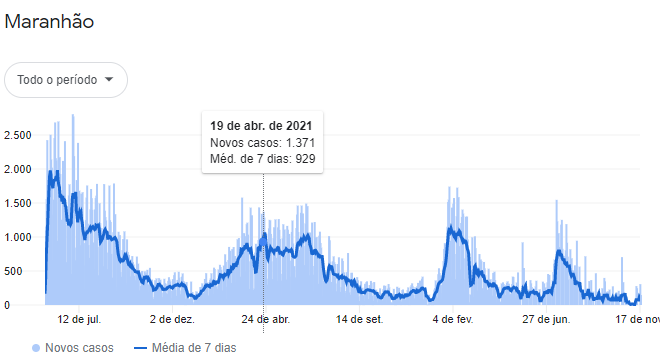

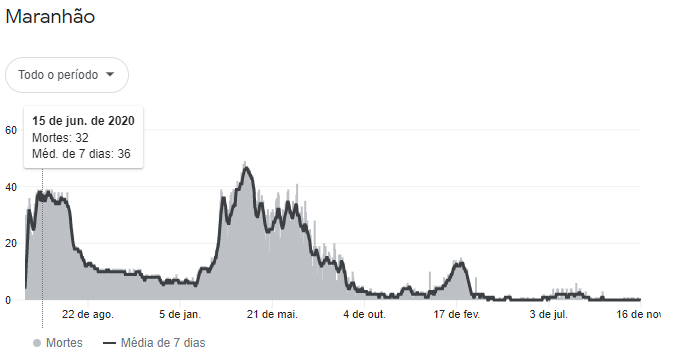

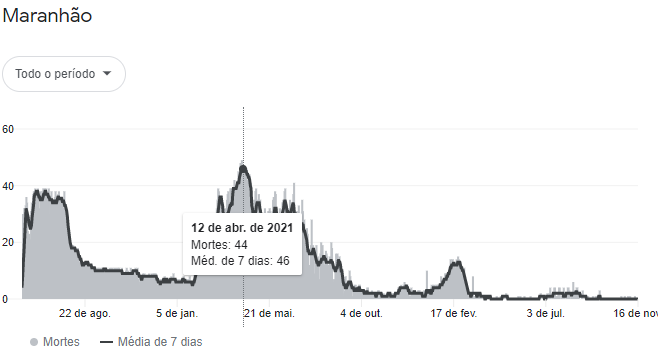



2. Quais municípios mais registraram ocorrência de queimadas por ano?

In [ ]:
queimadas_mun_ano = queimadas_MA_2018_2022.groupby(['municipio', 'ano']).size().reset_index().rename(columns = {0: 'total_queimadas'})
queimadas_mun_ano


,municipio,ano,total_queimadas
0,ACAILANDIA,2018,634
1,ACAILANDIA,2019,4828
2,ACAILANDIA,2020,9854
3,ACAILANDIA,2021,4988
4,ACAILANDIA,2022,5481
...,...,...,...
1079,ZE DOCA,2018,326
1080,ZE DOCA,2019,1792
1081,ZE DOCA,2020,2644
1082,ZE DOCA,2021,1136


In [ ]:
## Mapa coroplético
!pip install geopandas

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import geopandas as gpd

In [ ]:
#ler os dataframes

shapefile = gpd.read_file('/content/drive/MyDrive/LETS CODE SUZANO - Turma 864/Projeto 3/MA_Municipios_2021.shp')
print(shapefile.head(2))
print(queimadas_mun_ano.head(2))

    CD_MUN          NM_MUN SIGLA  AREA_KM2  \
0  2109452          RAPOSA    MA    79.213   
1  2107506  PACO DO LUMIAR    MA   127.193   

                                            geometry  
0  POLYGON ((-47.08314 -4.29571, -47.08319 -4.295...  
1  POLYGON ((-43.26164 -4.08394, -43.26125 -4.084...  
    municipio   ano  total_queimadas
0  ACAILANDIA  2018              634
1  ACAILANDIA  2019             4828


In [ ]:
# Juntar os dataframes 
geodata = pd.merge(left = queimadas_mun_ano, right = shapefile, left_on = 'municipio', right_on = 'NM_MUN', how = 'inner' )
geodata.head(2)

,municipio,ano,total_queimadas,CD_MUN,NM_MUN,SIGLA,AREA_KM2,geometry
0,ACAILANDIA,2018,634,2100055,ACAILANDIA,MA,5805.159,"MULTIPOLYGON (((-45.41114 -1.41831, -45.41387 ..."
1,ACAILANDIA,2019,4828,2100055,ACAILANDIA,MA,5805.159,"MULTIPOLYGON (((-45.41114 -1.41831, -45.41387 ..."


In [ ]:
#Removendo a coluna NM_MUNICIP
del geodata['NM_MUN']

In [ ]:
geodf = gpd.GeoDataFrame(geodata)
geodf.head(2)

,municipio,ano,total_queimadas,CD_MUN,SIGLA,AREA_KM2,geometry
0,ACAILANDIA,2018,634,2100055,MA,5805.159,"MULTIPOLYGON (((-45.41114 -1.41831, -45.41387 ..."
1,ACAILANDIA,2019,4828,2100055,MA,5805.159,"MULTIPOLYGON (((-45.41114 -1.41831, -45.41387 ..."


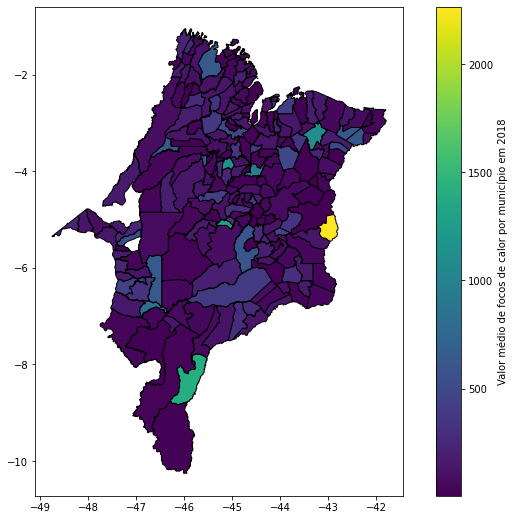

In [ ]:
geodf.loc[geodf['ano'] == 2018].plot(
    figsize=(12,9),
    edgecolor='black',column='total_queimadas',
    legend=True,
    legend_kwds={'label': "Valor médio de focos de calor por município em 2018",'orientation':"vertical" })
plt.show()

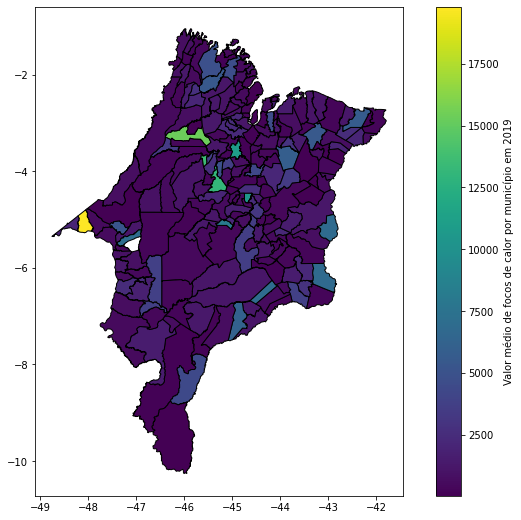

In [ ]:
geodf.loc[geodf['ano'] == 2019].plot(
    figsize=(12,9),
    edgecolor='black',column='total_queimadas',
    legend=True,
    legend_kwds={'label': "Valor médio de focos de calor por município em 2019",'orientation':"vertical" })
plt.show()


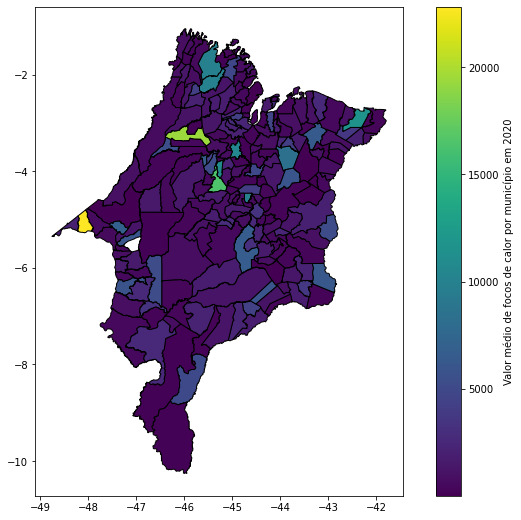

In [ ]:
geodf.loc[geodf['ano'] == 2020].plot(
    figsize=(12,9),
    edgecolor='black',column='total_queimadas',
    legend=True,
    legend_kwds={'label': "Valor médio de focos de calor por município em 2020",'orientation':"vertical" })
plt.show()


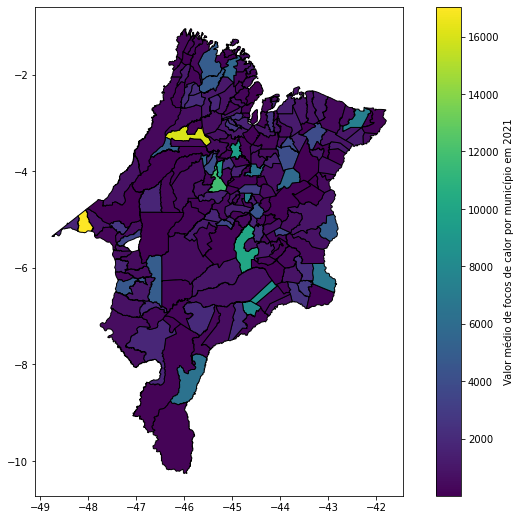

In [ ]:
geodf.loc[geodf['ano'] == 2021].plot(
    figsize=(12,9),
    edgecolor='black',column='total_queimadas',
    legend=True,
    legend_kwds={'label': "Valor médio de focos de calor por município em 2021",'orientation':"vertical" })
plt.show()


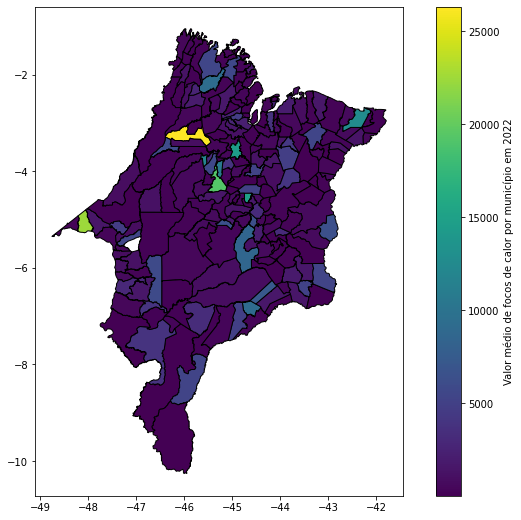

In [ ]:
geodf.loc[geodf['ano'] == 2022].plot(
    figsize=(12,9),
    edgecolor='black',column='total_queimadas',
    legend=True,
    legend_kwds={'label': "Valor médio de focos de calor por município em 2022",'orientation':"vertical" })
plt.show()

3. Quais satélites registraram mais queimadas por ano? 

In [ ]:
queimadas_satelite_ano = queimadas_MA_2018_2022.groupby(['satelite', 'ano']).size().reset_index().rename(columns = {0: 'total_queimadas'})
queimadas_satelite_ano


,satelite,ano,total_queimadas
0,AQUA_M-M,2018,180
1,AQUA_M-M,2019,1263
2,AQUA_M-M,2020,1672
3,AQUA_M-M,2021,1332
4,AQUA_M-M,2022,2196
...,...,...,...
70,TERRA_M-T,2018,817
71,TERRA_M-T,2019,7475
72,TERRA_M-T,2020,8339
73,TERRA_M-T,2021,6136


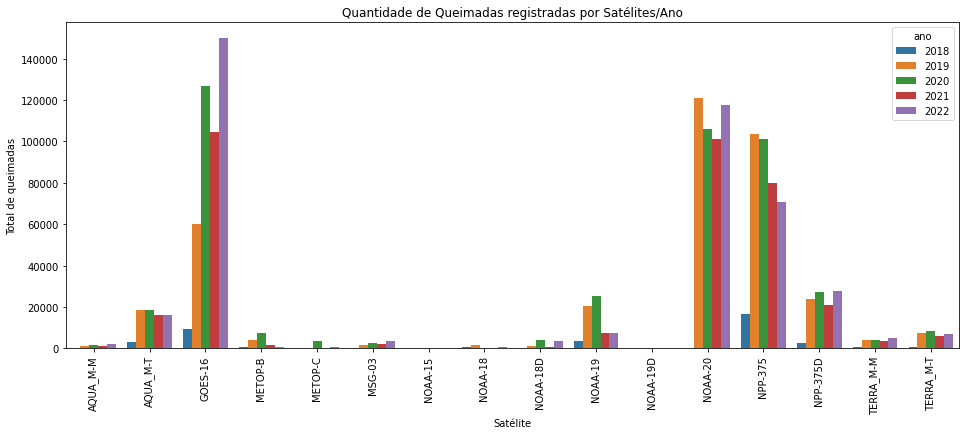

In [ ]:
plt.figure(figsize=(16,6))
sns.barplot(data=queimadas_satelite_ano, x="satelite", y="total_queimadas", hue="ano")
plt.xticks(rotation=90)
plt.xlabel('Satélite');
plt.ylabel('Total de queimadas')
plt.title('Quantidade de Queimadas registradas por Satélites/Ano');

4. Quais biomas foram mais afetados por ano?

In [ ]:
queimadas_biomas_ano = queimadas_MA_2018_2022.groupby(['bioma', 'ano']).size().reset_index().rename(columns = {0: 'total_queimadas'})
queimadas_biomas_ano

,bioma,ano,total_queimadas
0,Amazonia,2018,18893
1,Amazonia,2019,93787
2,Amazonia,2020,102410
3,Amazonia,2021,68705
4,Amazonia,2022,71917
5,Caatinga,2018,467
6,Caatinga,2019,5090
7,Caatinga,2020,3719
8,Caatinga,2021,3496
9,Caatinga,2022,6077


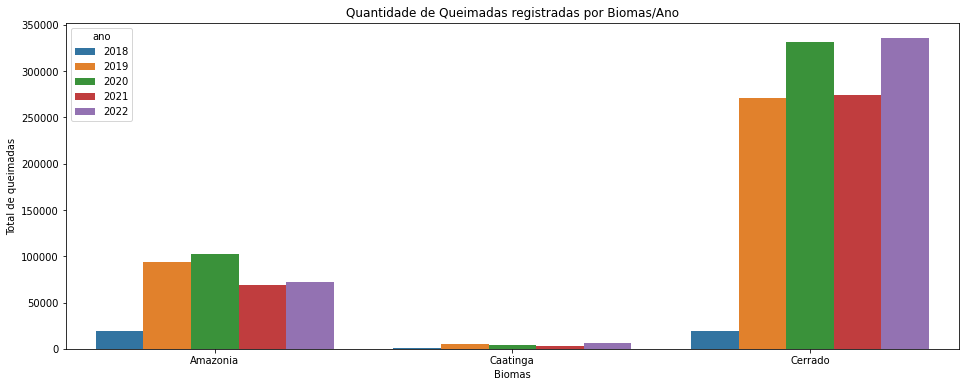

In [ ]:
plt.figure(figsize=(16,6))
sns.barplot(data=queimadas_biomas_ano, x="bioma", y="total_queimadas", hue="ano")
plt.xlabel('Biomas');
plt.ylabel('Total de queimadas')
plt.title('Quantidade de Queimadas registradas por Biomas/Ano');

5. Quantos valores faltantes tem no dataframe?

In [ ]:
valores_faltes = pd.DataFrame(queimadas_MA_2018_2022.isnull().sum())
valores_faltes

,0
Unnamed: 0,0
datahora,0
satelite,0
pais,0
estado,0
municipio,0
bioma,0
diasemchuva,15582
precipitacao,15582
riscofogo,15582


4. Discussão

	
  O Maranhão se encontra entre os três primeiros estados que são mais afetados pelas queimadas ao longo do ano, essas queimadas podem se dá por alguns fatores, podemos destacar: fatores climáticos, como baixa umidade do ar, ocorrência de baixa precipitação, grandes amplitudes de temperatura (BRASIL,2021). Esse fato também pode ser evidenciado através da noticia publicado pelo g1 através do Link: https://g1.globo.com/ma/maranhao/noticia/2022/07/29/maranhao-ja-registra-mais-de-3500-focos-de-incendio-em-2022.ghtml.

A partir da nossa análise exploratória com dados obtidos pelo INPE, podemos então constatar esse fato, realizando uma leitura breve do gráfico 1, no qual indica uma maior incidência de focos de queimadas entre os meses de junho á novembro, período considerado de estiagem, quando o calor aumenta e a umidade relativa do ar despenca. De acordo com nosso gráfico o ano com maior pico de focos de calor tem sido até o momento 2022 e o de menor pico foi o de 2021.
	
  Questionando o porquê do estado do Maranhão sofrer tanto com queimadas, podemos destacar que o seu é predominante Cerrado e Amazônia. A vegetação do bioma cerrado é composta por grama e pequenos arbustos que durante a estação de seca, perdem água e se tornam combustível natural para queimadas, e são intensificadas geralmente são ocasionadas devido às atividades de manejo do solo e pastagem. Enquanto no bioma amazônico o desmatamento é um problema que mais o atinge através exploração da madeira (LIMA, 2018). O município de Balsas foi o que mais teve incidência de focos de queimadas e é considerada polo do agronegócio, maiores produtores de soja do país. 
	Os satélites são importantes para detecção dos focos de calor e consequentemente no combate do as áreas que podem ser queimadas. Vale ressaltar que “considerando o modo regular de detecção e utilizando-se um único satélite como referência, podem-se constatar tendências espaciais e temporais nas ocorrências de fogo. 	A relação foco x queimada não é direta nas imagens de satélite. Um foco indica a existência de fogo em um elemento de resolução da imagem (pixel), que varia de 375 m x 375 m até 5 km x 4 km, dependendo do satélite. Nesse pixel, pode haver uma ou várias queimadas distintas cuja indicação será de um único foco”(BRASIL,2021).



Em 2020, o mundo foi atingido por um período pandêmico do Covid-19. 
A covid-19 é uma doença infecciosa, causada pelo novo coronavírus (SARS-CoV-2), caracterizada por quadros clínicos que variam de infecções assintomáticas a síndromes respiratórias graves. Considerando que o novo coronavírus também afeta o trato respiratório, assim como a exposição aos poluentes derivados de queimadas e incêndios florestais. Em linhas gerais, a baixa qualidade do ar, resultado de queimadas, podem piorar casos dos agravados pela doença, dificultando assim a respiração. Porém, observou-se que entre o período de pico da pandemia e os picos da queimadas não aparente serem relacionados, uma vez que houve uma queda de novos casos no período do segundo semestre, quando estado do Maranhão entra no período de estiagem. 
Os picos de queimadas durante o período de 2018-2019 teve tendência a aumento no gráfico, mas não acreditamos que as queimadas aumentaram por causa do covid, existem diversas variáveis climáticas que influenciam no aumento do foco calor.
Atualmente estamos passando por crescimento de temperatura mundial e a tendência que os eventos fiquem mais graves.


6. Referências

BRASIL. Ministério da Saúde. Queimadas e incêndios florestais : atuação da vigilância em saúde. Brasília : Ministério da Saúde, 2021.

IBGE. Instituto Brasileiro de Geografia e Estatística. Disponível em<https://www.ibge.gov.br/cidades-e-estados/ma.html>Acesso em:16/11/2022

INEP. Portal de Queimadas. Disponível em <https://queimadas.dgi.inpe.br/queimadas/portal>Acesso em:16/11/2022 

Lima, Isabella Monitoramento dos focos de queimadas nos biomas Amazônia e Cerrado nas estações seca e chuvosa de 2017 Uberlândia – MG 2018 

Coronavirus(covid-19) Disponível em< https://www.google.com/search?q=numero+casos+de+covid+maranh%C3%A3o&rlz=1C1SQJL_pt-BRBR925BR925&sxsrf=ALiCzsZljTFunrb-fEGNOzOQu1Bwj9UM-w%3A1668799215111&ei=79p3Y8iiBv_Z1sQPutqTgAI&ved=0ahUKEwiI1qvDubj7AhX_rJUCHTrtBCAQ4dUDCA8&uact=5&oq=numero+casos+de+covid+maranh%C3%A3o&gs_lcp=Cgxnd3Mtd2l6LXNlcnAQAzIHCAAQHhCiBDoFCCEQoAE6CAghEBYQHhAdOgYIABAWEB5KBAhBGAFKBAhGGABQK1i1DWDSG2gBcAB4AoABlASIAccVkgELMC4zLjAuMS4yLjKYAQCgAQHAAQE&sclient=gws-wiz-serp >Acesso em:16/11/2022
